In [2]:
import sqlite3
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
c = conn.cursor()

In [35]:
c.execute('''SELECT DISCOVERY_DATE, STAT_CAUSE_CODE, STAT_CAUSE_DESCR, 
CONT_DATE-DISCOVERY_DATE, FIRE_SIZE, LATITUDE, LONGITUDE   
FROM FIRES''')
rows = c.fetchall()
i=0
for row in rows:
    i+=1
    if i == 10:
        break
    print(row)
    
# They say the format for the dates is: mm/dd/yyyy, but it's clearly not the case
# FIRE SIZE is: Estimate of acres within the final perimeter of the fire
# Latitude and Longitude are in decimal degree NAD83. NAD83 is a way to express 
# latitude and logitude slightly different of other systems like NAD27.

(2453403.5, 9.0, 'Miscellaneous', 0.0, 0.1, 40.03694444, -121.00583333)
(2453137.5, 1.0, 'Lightning', 0.0, 0.25, 38.93305556, -120.40444444)
(2453156.5, 5.0, 'Debris Burning', 0.0, 0.1, 38.98416667, -120.73555556)
(2453184.5, 1.0, 'Lightning', 5.0, 0.1, 38.55916667, -119.91333333)
(2453184.5, 1.0, 'Lightning', 5.0, 0.1, 38.55916667, -119.93305556)
(2453186.5, 1.0, 'Lightning', 1.0, 0.1, 38.63527778, -120.10361111)
(2453187.5, 1.0, 'Lightning', 1.0, 0.1, 38.68833333, -120.15333333)
(2453437.5, 5.0, 'Debris Burning', 0.0, 0.8, 40.96805556, -122.43388889)
(2453444.5, 5.0, 'Debris Burning', 0.0, 1.0, 41.23361111, -122.28333333)


In [38]:
c.execute('''SELECT DISCOVERY_DATE, FIRE_YEAR, DISCOVERY_DOY, CONT_DATE, CONT_DOY   
FROM FIRES''')
rows = c.fetchall()
i=0
for row in rows:
    i+=1
    if i == 10:
        break
    print(row)

(2453403.5, 2005, 33, 2453403.5, 33)
(2453137.5, 2004, 133, 2453137.5, 133)
(2453156.5, 2004, 152, 2453156.5, 152)
(2453184.5, 2004, 180, 2453189.5, 185)
(2453184.5, 2004, 180, 2453189.5, 185)
(2453186.5, 2004, 182, 2453187.5, 183)
(2453187.5, 2004, 183, 2453188.5, 184)
(2453437.5, 2005, 67, 2453437.5, 67)
(2453444.5, 2005, 74, 2453444.5, 74)


In [4]:
c.execute('''SELECT FIRE_YEAR, DISCOVERY_DATE-DISCOVERY_DOY-(FIRE_YEAR-1992)*365, 
CONT_DATE-CONT_DOY-(FIRE_YEAR-1992)*365, CONT_DATE-DISCOVERY_DATE   
FROM FIRES''')
rows = c.fetchall()
i=0
for row in rows:
    i+=1
    if i == 10:
        break
    print(row)
    
# The one more for 2005 is because of 2004 being a leap year, so one should use 366.
# Anyway, I have all the information with FIRE_YEAR and DISCOVERY_DOY

# CONT_DATE-DISCOVERY_DATE is useful as it is the number of day and will work
# even if we change year, while with DOY it will be negative and one will have to
# add 365 or 366 depending on the year.

# It means December 31st 1991 (one day before January 1st 1992) is: 2448622.5
# Because there as been 3 leap years before 2004 (1992, 1996, 2000) and 2448625.5-3=2448622.5

(2005, 2448625.5, 2448625.5, 0.0)
(2004, 2448624.5, 2448624.5, 0.0)
(2004, 2448624.5, 2448624.5, 0.0)
(2004, 2448624.5, 2448624.5, 5.0)
(2004, 2448624.5, 2448624.5, 5.0)
(2004, 2448624.5, 2448624.5, 1.0)
(2004, 2448624.5, 2448624.5, 1.0)
(2005, 2448625.5, 2448625.5, 0.0)
(2005, 2448625.5, 2448625.5, 0.0)


In [47]:
# Create Panda dataframe
import pandas as pd

c.execute('''SELECT FIRE_YEAR, DISCOVERY_DOY, STAT_CAUSE_DESCR, 
CONT_DATE-DISCOVERY_DATE, FIRE_SIZE, LATITUDE, LONGITUDE   
FROM FIRES''')
rows = c.fetchall()
df = pd.DataFrame(rows)
df.columns = ['year', 'day', 'cause', 'duration', 'size', 'lat', 'lon']
# df['duration'] = df['duration'].astype(int)
# They complain about NaN for duration
df.head()

,year,day,cause,duration,size,lat,lon
0,2005,33,Miscellaneous,0.0,0.10,40.036944,-121.005833
1,2004,133,Lightning,0.0,0.25,38.933056,-120.404444
2,2004,152,Debris Burning,0.0,0.10,38.984167,-120.735556
3,2004,180,Lightning,5.0,0.10,38.559167,-119.913333
4,2004,180,Lightning,5.0,0.10,38.559167,-119.933056


In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

display(df.describe())
display(df.describe(include=['O']))

# There are too many NaN for duration. Also, one is 4018, so it's probably not good. Let's get duration otherwise.

,year,day,duration,size,lat,lon
count,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,1.647191e+02,1.233722,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,9.003891e+01,15.618890,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e+00,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,8.900000e+01,0.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.640000e+02,0.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.300000e+02,0.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,3.660000e+02,4018.000000,6.069450e+05,7.033060e+01,-6.525694e+01


,cause
count,1880465
unique,13
top,Debris Burning
freq,429028


In [63]:
# Try with CONT_DOY (but it might be that both CONT_DOY and CONT_DATE are unknown together, so the NaN will stay the same)
c.execute('''SELECT FIRE_YEAR, DISCOVERY_DOY, STAT_CAUSE_DESCR, 
CONT_DOY-DISCOVERY_DOY, FIRE_SIZE, LATITUDE, LONGITUDE   
FROM FIRES''')
rows = c.fetchall()
df = pd.DataFrame(rows)
df.columns = ['year', 'day', 'cause', 'duration', 'size', 'lat', 'lon']
display(df.describe()) # Some duration will be negative if there is a change of date

,year,day,duration,size,lat,lon
count,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,1.647191e+02,1.090041,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,9.003891e+01,8.867567,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e+00,-365.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,8.900000e+01,0.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.640000e+02,0.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.300000e+02,0.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,3.660000e+02,364.000000,6.069450e+05,7.033060e+01,-6.525694e+01


In [64]:
def fun(row):
    x = row['duration']
    if(x>=0): return x
    else:
        if row['year']%4 == 0: # leap year
            return x + 366
        else:
            return x + 365

df['duration'] = df.apply(fun,axis=1)
display(df.describe())

,year,day,duration,size,lat,lon
count,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,1.647191e+02,1.142863,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,9.003891e+01,8.304796,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e+00,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,8.900000e+01,0.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.640000e+02,0.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.300000e+02,0.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,3.660000e+02,365.000000,6.069450e+05,7.033060e+01,-6.525694e+01


In [180]:
# Duration of 365 seems strange. Let's verify if it's real or it's a mistake due to my way to get the duration.
# For that, I need to see the day contained.

c.execute('''SELECT FIRE_YEAR, STAT_CAUSE_DESCR, 
CONT_DOY, DISCOVERY_DOY, CONT_DOY-DISCOVERY_DOY, FIRE_SIZE, LATITUDE, LONGITUDE, CONT_DATE, DISCOVERY_DATE, 
CONT_DATE-DISCOVERY_DATE   
FROM FIRES''')
rows = c.fetchall()
df2 = pd.DataFrame(rows)
df2.columns = ['year', 'cause', 'day contained', 'day discovered', 'duration', 'size', 'lat', 'lon','date contained',
               'date discovered','duration2']

def fun(row):
    x = row['duration']
    if(x>=0): return x
    else:
        if row['year']%4 == 0: # leap year
            return x + 366
        else:
            return x + 365

df2['duration'] = df2.apply(fun,axis=1)
display(df2[df2['duration']==365])

,year,cause,day contained,day discovered,duration,size,lat,lon,date contained,date discovered,duration2
34763,2008,Lightning,117.0,118,365.0,0.30,38.368611,-79.146944,2454948.5,2454583.5,365.0
48658,1992,Lightning,300.0,301,365.0,0.10,36.295000,-118.708333,2449287.5,2448922.5,365.0
132471,2000,Debris Burning,104.0,105,365.0,0.10,43.863889,-85.804167,2452378.5,2451648.5,730.0
1062893,2004,Miscellaneous,233.0,234,365.0,0.50,39.591667,-119.859722,2453603.5,2453238.5,365.0
1234308,2008,Missing/Undefined,115.0,116,365.0,20.00,31.970500,-109.923000,2454946.5,2454581.5,365.0
1234312,2008,Railroad,120.0,121,365.0,2.00,32.004000,-110.070000,2454951.5,2454586.5,365.0
1234346,2008,Missing/Undefined,149.0,150,365.0,3.00,31.423200,-109.623700,2454980.5,2454615.5,365.0
1298616,2008,Miscellaneous,119.0,120,365.0,0.97,43.304201,-73.430111,2454950.5,2454585.5,365.0
1351259,2000,Miscellaneous,80.0,81,365.0,0.10,42.066412,-76.644236,2454911.5,2451624.5,3287.0
1576636,2012,Arson,287.0,288,365.0,2.00,47.988100,-98.899700,2456579.5,2456214.5,365.0


In [181]:
display(df2.describe())

,year,day contained,day discovered,duration,size,lat,lon,date contained,date discovered,duration2
count,1.880465e+06,988934.000000,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,1.880465e+06,988934.000000
mean,2.003710e+03,172.656766,1.647191e+02,1.142863,7.452016e+01,3.678121e+01,-9.570494e+01,2.453238e+06,2.453064e+06,1.233722
std,6.663099e+00,84.320348,9.003891e+01,8.304796,2.497598e+03,6.139031e+00,1.671694e+01,2.687548e+03,2.434573e+03,15.618890
min,1.992000e+03,1.000000,1.000000e+00,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02,2.448622e+06,2.448622e+06,0.000000
25%,1.998000e+03,102.000000,8.900000e+01,0.000000,1.000000e-01,3.281860e+01,-1.103635e+02,2.450701e+06,2.451084e+06,0.000000
50%,2.004000e+03,181.000000,1.640000e+02,0.000000,1.000000e+00,3.545250e+01,-9.204304e+01,2.453466e+06,2.453178e+06,0.000000
75%,2.009000e+03,232.000000,2.300000e+02,0.000000,3.300000e+00,4.082720e+01,-8.229760e+01,2.455754e+06,2.455036e+06,0.000000
max,2.015000e+03,366.000000,3.660000e+02,365.000000,6.069450e+05,7.033060e+01,-6.525694e+01,2.457392e+06,2.457388e+06,4018.000000


All those fire have the day contained one day before the day discovered which I assume means that the duration in 365 because it must have been 1 year later, but it might also be due to a fire which has been contained fast and somehow someone put different date for contained and discovered. All those fire are small, so it would be strange that they last 1 year.

CONT_DATE and DISCOVERY_DATE are strange, but most of the time their difference concord with my definition of duration. If it's the true duration though, some fires lasted for years. The longest lasted 4018 days, that is 11 years.

In any case, few fires are concerned by long duration.

Also, around half the fire (891531) don't have a contained date.

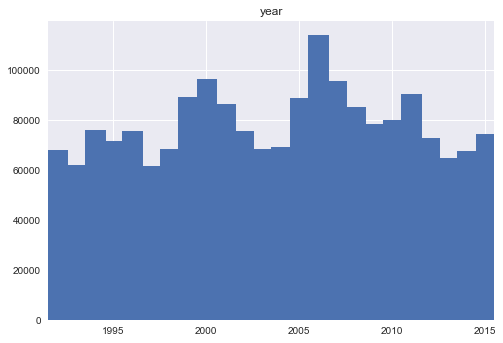

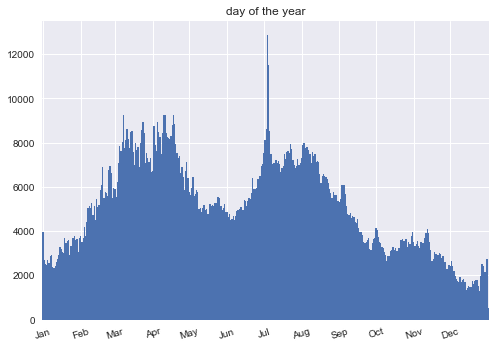

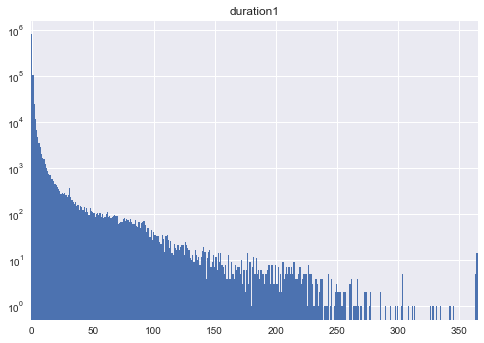

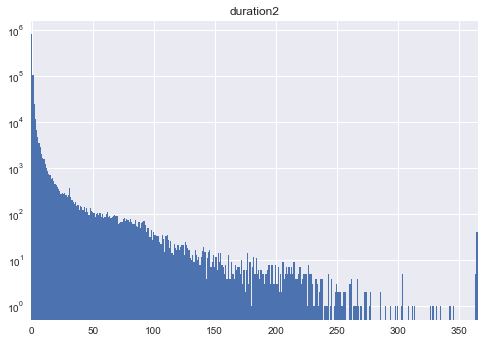

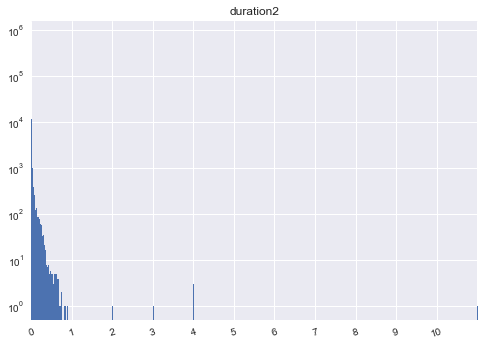

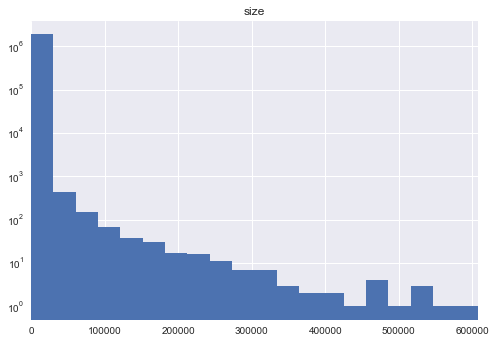

In [203]:
# simply use df.hist(bin=365) for DOY do not work as the result is clearly different and in particluar the bin 366 is empty. 
# So I use df.groupby(...).size() to get the good histogram for every histogram with discrete values.

# year
tmp = df.groupby('year').size()
hist = tmp.values
width = 1.1
center = np.arange(1991.5,2015.5)
plt.bar(center, hist, align='edge', width=width)
ax=plt.gca()
ax.set_xlim((1991.5,2015.5))
plt.title('year')
plt.show()

# day
tmp = df.groupby('day').size()
hist = tmp.values
width = 1
center = np.arange(0.5,366.5)
plt.bar(center, hist, align='edge', width=width)
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# Those numbers don't work for leap year, but it doesn't really matter.
day =[1,32,60,91,121,152,182,213,244,274,305,335]
plt.xticks(day, month, rotation=17)
ax=plt.gca()
ax.set_xlim((0.5,366.5))
plt.title('day of the year')
plt.show()

#duration1
hist = df.groupby('duration').size()
center = np.arange(-0.5,365.5)
index = np.arange(0.,366)
hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
hist = hist0.add(hist,fill_value=0)
plt.bar(center, hist, align='edge', width=1)
ax=plt.gca()
ax.set_xlim((-0.5,365.5))
ax.set_yscale('log')
plt.title('duration1')
plt.show()

#duration2 limited at 365 to compare with duration1
hist = df2.groupby('duration2').size()
center = np.arange(-0.5,4018.5)
index = np.arange(0.,4019)
hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
hist = hist0.add(hist,fill_value=0)
plt.bar(center, hist, align='edge', width=1)
ax=plt.gca()
ax.set_xlim((-0.5,365.5))
ax.set_yscale('log')
plt.title('duration2')
plt.show()

#duration2
plt.bar(center, hist, align='edge', width=1)
ax=plt.gca()
ax.set_xlim((-0.5,4018.5))
ax.set_yscale('log')
plt.xticks(np.arange(0,4018,365), range(11), rotation=17)
plt.title('duration2')
plt.show()

#size
df['size'].hist(bins=20)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xlim((0.,df['size'].max()))
plt.title('size')
plt.show()

In each plot but the last each bar is centered on one integer value (day or year). In the second plot, the indicator are at the beggining of each month (for leap year they are at the end of the previous month for all month after February). In the last plot, the x-axis is a real number, so they are real bins.

The distribution in years is bumpy, but we can see an increasing trend from
1992 to 2006 and then a decreasing trend.

The distribution in day of the year has a bump in March and April and a bump in July
which peaks in early July.

For duration 1:

Most fires don't last long, it's a logarithmic plot. They are very few fires that
lasted more than 250 days, but there is a peak (14 cases) at 365 which I believe is due to a mistake
in the notation. There is also a strange number of case at 364.

For duration 2:
The peaks at 364 and 365 are even bigger. There are also peaks at multiple of 365.
!! Why I don't see peaks at 1 in year !!!

Those high duration fire are strangely distributed, but it's not clear what is their real duration.


Most fires are small, it's a logarithmic plot.

In [214]:
# Try to understand duration better

hist1 = df[df['duration']>360.].groupby('duration').size()

hist2 = df2[df2['duration2']>360.].groupby('duration2').size()

display(pd.concat([hist1,hist2],axis=1))

# It doesn't correspond to what I see in the plot which goes up to 4018 since I see nothing at 1 and only single peaks after that.

,0,1
364.0,5.0,5
365.0,14.0,40
366.0,NaN,19
367.0,NaN,2
368.0,NaN,1
369.0,NaN,1
370.0,NaN,2
371.0,NaN,3
374.0,NaN,2
375.0,NaN,1


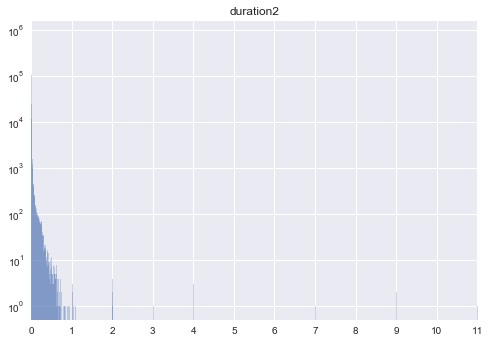

In [277]:
# The only explanation is that some bar are invisible because they are too thin. Try with thicker bar even though it will make
# them go over other bars.
hist = df2.groupby('duration2').size()
center = np.arange(-0.5,4018.5)
index = np.arange(0.,4019)
hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
hist = hist0.add(hist,fill_value=0)
plt.bar(center, hist, align='edge', width=3, alpha=0.3)
ax=plt.gca()
ax.set_xlim((-0.5,4018.5))
ax.set_yscale('log')
plt.xticks(np.arange(0,4018,365), range(12))
plt.title('duration2')
plt.show()

# We can see peaks at the years: 1, 2, 3, 4, 7, 9, 11. This is certainly not natural.

In [159]:
# Look closely to the July peak.

tmp = df.groupby('day').size()
display(tmp[tmp.idxmax()-4:tmp.idxmax()+4])
# In July, for a non-leap year 182 is the 1st, 183 the 2nd, 184 the 3rd, 185 the 4th.

# One can think that the increased in fire is due to the 4th of July festivity. They are on 185 3/4 of the time and 186 the
# remaining 1/4 times.

day
182     7556
183     8136
184     8636
185    12875
186    11535
187     8515
188     7484
189     7042
dtype: int64

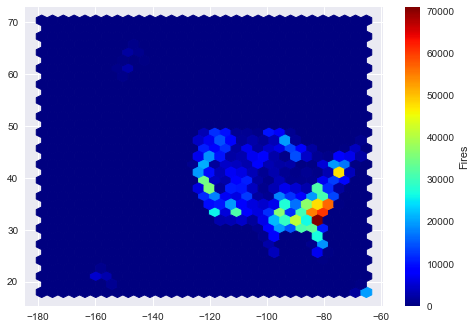

In [166]:
from matplotlib import cm
gridsize=30
plt.hexbin(df['lon'].values, df['lat'].values, gridsize=gridsize, cmap=cm.jet)
ax=plt.gca()
ax.set_yscale('log')
cb = plt.colorbar()
cb.set_label('Fires')
plt.show()

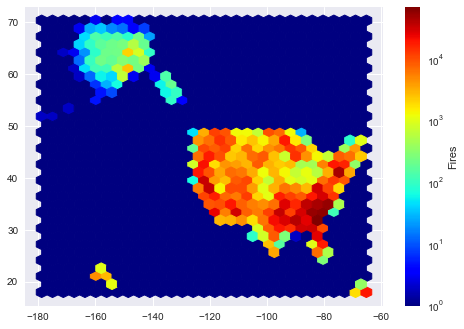

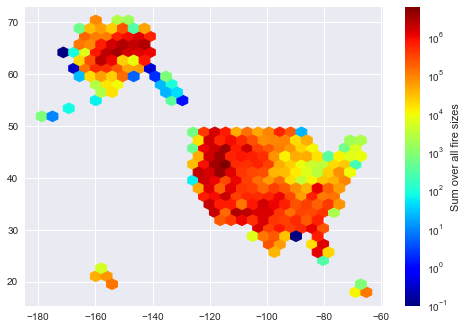

In [198]:
from matplotlib import cm, colors
gridsize=30
plt.hexbin(df['lon'].values, df['lat'].values, gridsize=gridsize, cmap=cm.jet,
          norm=colors.LogNorm())
cb = plt.colorbar()
cb.set_label('Fires')
plt.show()

gridsize=30
plt.hexbin(df['lon'].values, df['lat'].values,df['size'].values, gridsize=gridsize, reduce_C_function=np.sum, cmap=cm.jet,
          norm=colors.LogNorm())
cb = plt.colorbar()
cb.set_label('Sum over all fire sizes')
plt.show()

We can see it corresponds to the USA with Alaska (top left), Hawaii (bottom left) and Puerto Rico (bottom right). 

Most fires happens in the South East. There are also a lot of fires on the West coast and the Mid-Atlantic region.

When we consider the size of the fire, the most burned region are the center of Alaska and the West. The South East is still considerably burned.

Hexagone on the coast can contain a lot of water, that's why they can have a lot less fire than their neighboors.

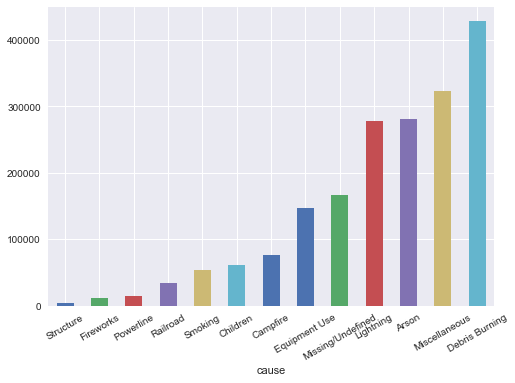

In [173]:
hist = df.groupby('cause').size().sort_values()
hist.plot('bar', rot=30)

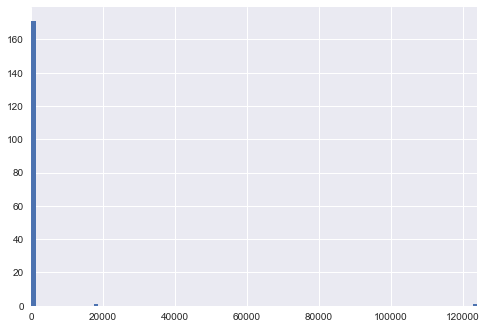

,year,cause,day contained,day discovered,duration,size,lat,lon,date contained,date discovered,duration2
365947,2002,Lightning,70.0,123,312.0,124110.0,30.668889,-82.293611,2452709.5,2452397.5,312.0
1572579,2012,Arson,253.0,248,5.0,17944.0,38.944440,-122.344500,2456545.5,2456174.5,371.0


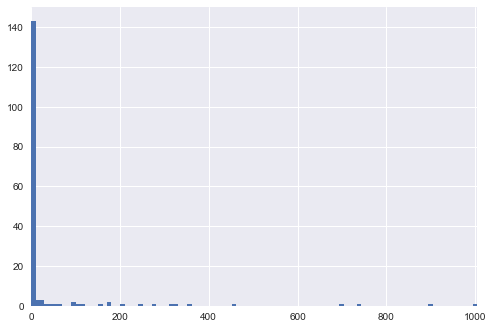

In [224]:
# Look at fire whose duration is longer than 250.
df1 = df2[df2['duration2']>250]

#size
df1['size'].hist(bins=100)
ax=plt.gca()
#ax.set_yscale('log')
ax.set_xlim((0.,df1['size'].max()))
plt.show()

# Almost all long fire are small. Only two are large.

display(df1[df1['size']>10000])

# Look at the histogram of the small ones.
df10=df1[df1['size']<10000]
df10['size'].hist(bins=100)
ax=plt.gca()
#ax.set_yscale('log')
ax.set_xlim((0.,df10['size'].max()))
plt.show()

I believe duration2 is the good one. It seems that most long lived fire are very small. For unknown reason, people let them burn for a very long time.

According to https://www.kaggle.com/rtatman/188-million-us-wildfires/discussion/39627
Date is a continuous count of days since noon Universal Time on January 1, 4713 BC (Julian Calendar)
So the difference of dates is the number of days.

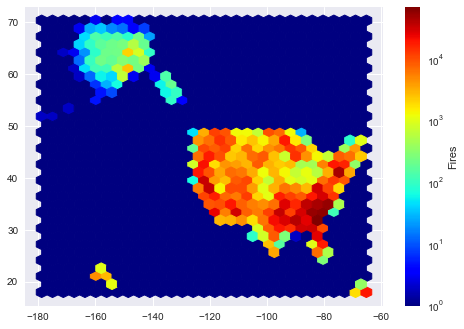

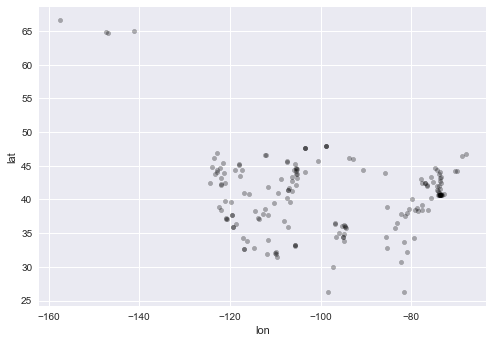

In [291]:
# Look at localization of long lived fire.

df1 = df2[df2['duration2']>250]

# Look at scatter plot on top of hexagonal plot of all fire to compare long lived fires to all fires.

gridsize=30
plt.hexbin(df['lon'].values, df['lat'].values, gridsize=gridsize, cmap=cm.jet,
          norm=colors.LogNorm(), zorder=1)
cb = plt.colorbar()
cb.set_label('Fires')

df1.plot(x='lon',y='lat',kind='scatter', alpha=0.3, color='k', zorder=2)
plt.show()

The long lived fires are everywhere in the contiguous USA and there are also in Alaska.

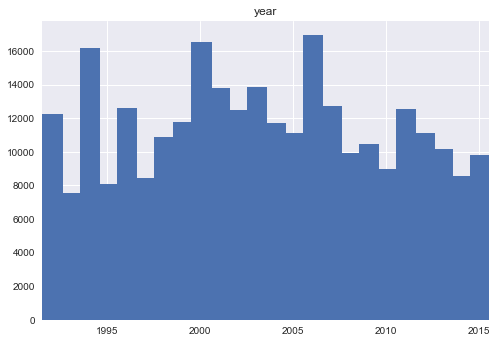

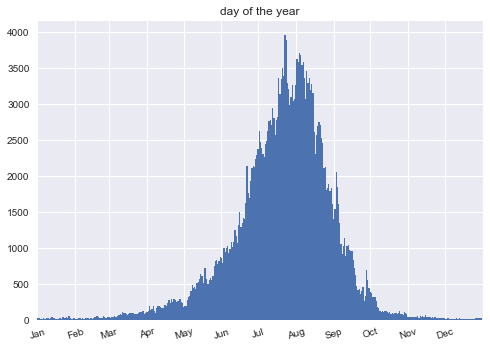

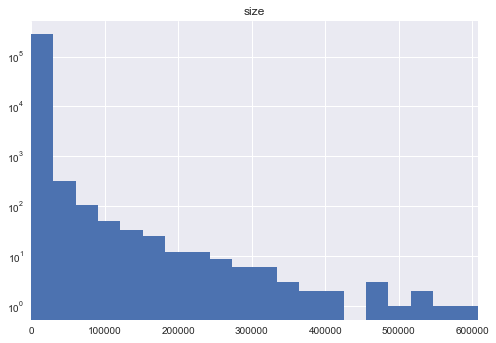

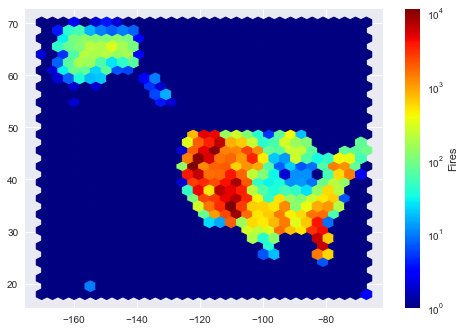

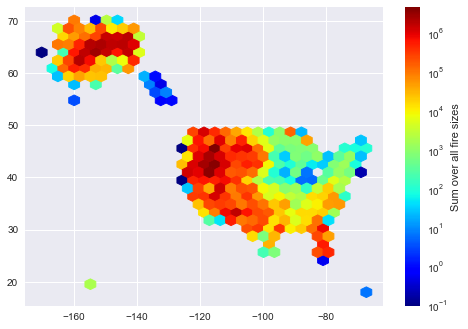

In [230]:
# Let's observe fire by Lightning

df_Lightning = df[df['cause']=='Lightning']

# year
hist = df_Lightning.groupby('year').size()
width = 1.1
center = np.arange(1991.5,2015.5)
index = np.arange(1992,2016)
hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
hist = hist0.add(hist,fill_value=0)
plt.bar(center, hist, align='edge', width=width)
ax=plt.gca()
ax.set_xlim((1991.5,2015.5))
plt.title('year')
plt.show()

# day
hist = df_Lightning .groupby('day').size()
width = 1
center = np.arange(0.5,366.5)
index = np.arange(1.,367.)
hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
hist = hist0.add(hist,fill_value=0)
plt.bar(center, hist, align='edge', width=width)
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# Those numbers don't work for leap year, but it doesn't really matter.
day =[1,32,60,91,121,152,182,213,244,274,305,335]
plt.xticks(day, month, rotation=17)
ax=plt.gca()
ax.set_xlim((0.5,366.5))
plt.title('day of the year')
plt.show()

#size
df_Lightning['size'].hist(bins=20)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xlim((0.,df['size'].max()))
plt.title('size')
plt.show()

# Map
gridsize=30
plt.hexbin(df_Lightning['lon'].values, df_Lightning['lat'].values, gridsize=gridsize, cmap=cm.jet,
          norm=colors.LogNorm())
cb = plt.colorbar()
cb.set_label('Fires')
plt.show()

plt.hexbin(df_Lightning['lon'].values, df_Lightning['lat'].values,df_Lightning['size'].values, gridsize=gridsize, reduce_C_function=np.sum, cmap=cm.jet,
          norm=colors.LogNorm())
cb = plt.colorbar()
cb.set_label('Sum over all fire sizes')
plt.show()

Lightning fire have only one peak centered in August. Also, they are mostly in Alaska, in the West and in Florida.

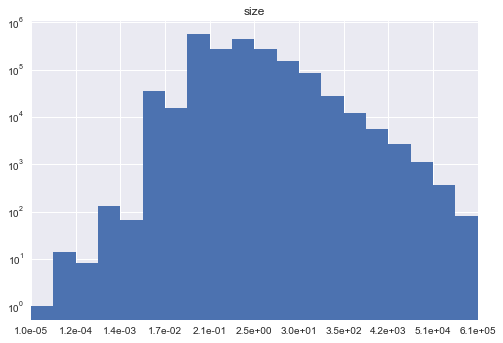

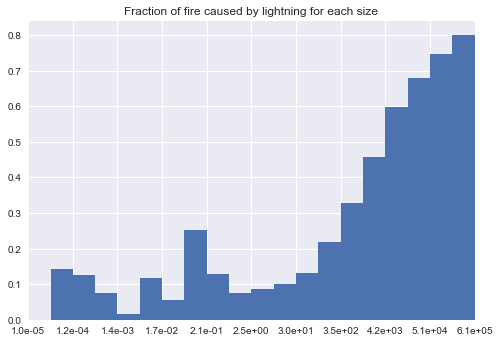

In [261]:
# Logarithmic bins
from matplotlib.ticker import FormatStrFormatter
binnumber = 20
maxsize = df['size'].max()
minsize = df['size'].min()
bins = (maxsize/minsize)**(np.arange(0,binnumber+1)/binnumber)*minsize

hist0, _ = np.histogram(df['size'],bins=bins)
#print(hist)
#print(bins)
histL, _ = np.histogram(df_Lightning['size'],bins=bins)
width = bins[1:]-bins[0:-1]
#print(histL)

plt.bar(bins[:-1], hist0, align='edge', width=width)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xlim((minsize,maxsize))
ax.set_xscale('log')
plt.title('size')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
plt.xticks(bins[::2])
plt.show()

hist = histL/hist0
plt.bar(bins[:-1], hist, align='edge', width=width)
ax=plt.gca()
ax.set_xlim((minsize,maxsize))
ax.set_xscale('log')
plt.title('Fraction of fire caused by lightning for each size')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
plt.xticks(bins[::2])
plt.show()

# Small fire are not usually caused by lightning, but then the fraction increases with the size and 80% of the big fires
# are caused by lightning.

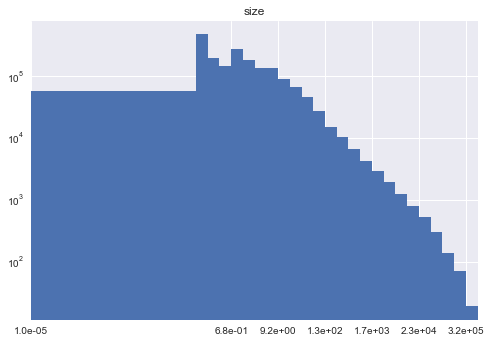

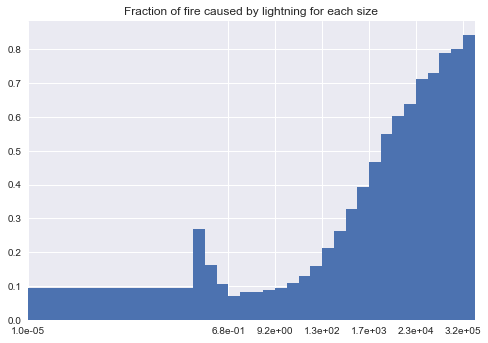

In [273]:
# Bellow 1e-1 the number of fire by bins is small. Let's put them together.

from matplotlib.ticker import FormatStrFormatter
binnumber = 25
maxsize = df['size'].max()
minsize = df['size'].min()
logsize = 5e-2
bins = (maxsize/logsize)**(np.arange(0,binnumber+1)/binnumber)*logsize
bins[0]=minsize

hist0, _ = np.histogram(df['size'],bins=bins)
#print(hist)
#print(bins)
histL, _ = np.histogram(df_Lightning['size'],bins=bins)
width = bins[1:]-bins[0:-1]
#print(histL)

plt.bar(bins[:-1], hist0, align='edge', width=width)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xlim((minsize,maxsize))
ax.set_xscale('log')
plt.title('size')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
plt.xticks(bins[::4])
plt.show()

hist = histL/hist0
plt.bar(bins[:-1], hist, align='edge', width=width)
ax=plt.gca()
ax.set_xlim((minsize,maxsize))
ax.set_xscale('log')
plt.title('Fraction of fire caused by lightning for each size')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
plt.xticks(bins[::4])
plt.show()